In [116]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

# Dataset

You can download dataset from here https://drive.google.com/open?id=1PnX8r45umX_lf3okyMMKXFZrhmqwD8rC

In [117]:
train_path = 'Dataset/Cats_Dogs/train'
valid_path = 'Dataset/Cats_Dogs/valid'
test_path = 'Dataset/Cats_Dogs/test'

In [118]:
train_batches = ImageDataGenerator().flow_from_directory(directory=train_path, target_size=(224,224),
    classes=['dog', 'cat'], batch_size=10)
valid_batches = ImageDataGenerator().flow_from_directory(directory=valid_path, target_size=(224,224),
    classes=['dog', 'cat'], batch_size=10)
test_batches = ImageDataGenerator().flow_from_directory(directory=test_path, target_size=(224,224),
    classes=['dog', 'cat'], batch_size=10)

Found 100 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [119]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [120]:
imgs, labels = next(train_batches)

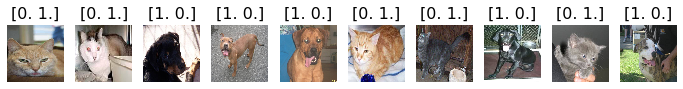

In [121]:
plots(imgs, titles=labels)

# Build and train CNN

In [122]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(224,224,3)),
    Flatten(),
    Dense(2, activation='softmax'),
    ])

In [123]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
flatten_3 (Flatten)          (None, 1577088)           0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 3154178   
Total params: 3,155,074
Trainable params: 3,155,074
Non-trainable params: 0
_________________________________________________________________


In [124]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [125]:
epochs=5

In [126]:
h=model.fit_generator(generator=train_batches, steps_per_epoch=10, 
    validation_data=valid_batches, validation_steps=10, epochs=epochs, verbose=2)

Epoch 1/5
 - 6s - loss: 2900.5487 - accuracy: 0.5200 - val_loss: 357.6375 - val_accuracy: 0.5100
Epoch 2/5
 - 5s - loss: 1578.6884 - accuracy: 0.5500 - val_loss: 2147.3745 - val_accuracy: 0.5000
Epoch 3/5
 - 5s - loss: 990.1101 - accuracy: 0.6200 - val_loss: 1078.0896 - val_accuracy: 0.4900
Epoch 4/5
 - 5s - loss: 582.8673 - accuracy: 0.6300 - val_loss: 412.2347 - val_accuracy: 0.4900
Epoch 5/5
 - 5s - loss: 204.0838 - accuracy: 0.7000 - val_loss: 92.0595 - val_accuracy: 0.4600


# Loss

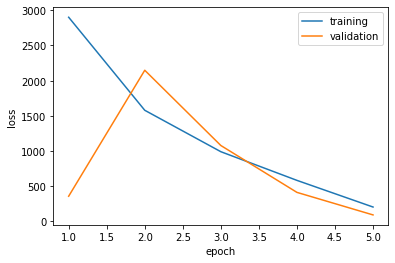

In [127]:
epoch_nums = range(1, epochs+1)
training_loss = h.history["loss"]
validation_loss = h.history["val_loss"]
plt.plot(epoch_nums , training_loss)
plt.plot(epoch_nums , validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training','validation'], loc='upper right')
plt.show()

# Predict

In [128]:
test_imgs, test_labels = next(test_batches)

C:\Users\raiya\Anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


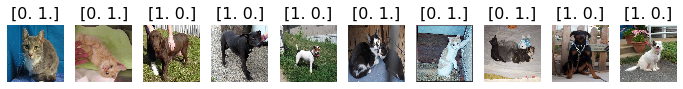

In [129]:
plots(test_imgs, titles=test_labels)

In [130]:
test_labels = test_labels[:,0]
test_labels

array([0., 0., 1., 1., 1., 0., 0., 0., 1., 1.], dtype=float32)

In [131]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)

In [132]:
predictions

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

# Precision, Recall, F1_Score

In [133]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, predictions[:,0]))

              precision    recall  f1-score   support

         0.0       0.43      0.60      0.50         5
         1.0       0.33      0.20      0.25         5

    accuracy                           0.40        10
   macro avg       0.38      0.40      0.38        10
weighted avg       0.38      0.40      0.38        10



# Confusion Matrix

In [134]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',):
    
    print('Confusion Matrix')
    print(cm)

    cmap=plt.cm.Blues
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion Matrix')
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=25)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() 
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j]),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black"
        )

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion Matrix
[[3 2]
 [4 1]]


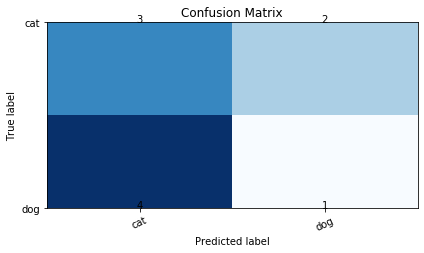

In [135]:
cm = confusion_matrix(test_labels, predictions[:,0])
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

# Build Fine-tuned VGG16 model

In [136]:
vgg16_model = keras.applications.vgg16.VGG16()

In [137]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [138]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [139]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [140]:
for layer in model.layers:
    layer.trainable = False

In [141]:
model.add(Dense(2, activation='softmax'))

In [142]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

# Train the fine-tuned VGG16 model

In [143]:
model.compile(optimizer=Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [144]:
epochs2=5

In [145]:
h2=model.fit_generator(generator=train_batches, steps_per_epoch=10, 
                    validation_data=valid_batches, validation_steps=10, epochs=epochs2, verbose=2)

Epoch 1/5
 - 187s - loss: 1.0189 - accuracy: 0.6000 - val_loss: 1.1237 - val_accuracy: 0.6600
Epoch 2/5
 - 206s - loss: 0.6196 - accuracy: 0.7300 - val_loss: 0.7674 - val_accuracy: 0.7200
Epoch 3/5
 - 202s - loss: 0.4089 - accuracy: 0.8300 - val_loss: 0.6398 - val_accuracy: 0.8200
Epoch 4/5
 - 201s - loss: 0.2798 - accuracy: 0.8700 - val_loss: 0.4593 - val_accuracy: 0.8600
Epoch 5/5
 - 202s - loss: 0.1998 - accuracy: 0.9000 - val_loss: 0.1731 - val_accuracy: 0.8700


# Loss

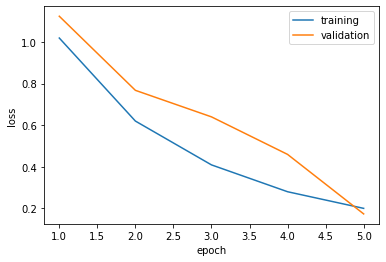

In [146]:
epoch_nums = range(1, epochs2+1)
training_loss = h2.history["loss"]
validation_loss = h2.history["val_loss"]
plt.plot(epoch_nums , training_loss)
plt.plot(epoch_nums , validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training','validation'], loc='upper right')
plt.show()

C:\Users\raiya\Anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


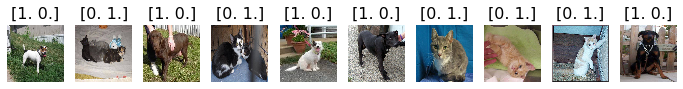

In [147]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [148]:
test_labels = test_labels[:,0]

# Predict using Fine-tuned VGG16 model

In [149]:
predictions = model.predict_generator(generator=test_batches, steps=1, verbose=0)

# Confusion Matrix

Confusion Matrix
[[5 0]
 [0 5]]


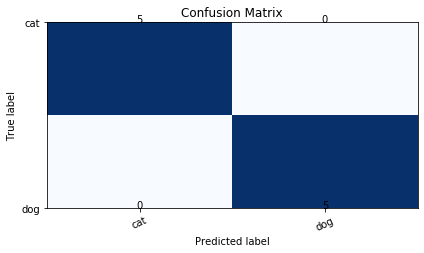

In [151]:
cm2 = confusion_matrix(y_true=test_labels, y_pred=np.round(predictions[:,0]))
cm_plot_labels2 = ['cat','dog']
plot_confusion_matrix(cm=cm2, classes=cm_plot_labels2, title='Confusion Matrix')